In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
from dateutil.relativedelta import relativedelta

In [2]:
campaign_master = pd.read_csv("campaign_master.csv")
class_master = pd.read_csv("class_master.csv")
customer_master = pd.read_csv("customer_master.csv")
use_log = pd.read_csv("use_log.csv")

In [3]:
campaign_master.head()

,campaign_id,campaign_name
0,CA1,通常
1,CA2,入会費半額
2,CA3,入会費無料


In [4]:
class_master.head()

,class,class_name,price
0,C01,オールタイム,10500
1,C02,デイタイム,7500
2,C03,ナイト,6000


In [5]:
customer_master.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [6]:
len(customer_master)

4192

In [7]:
use_log.head()

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [8]:
len(use_log)

197428

customer_master, class_master, campaign_masterをつなげる

In [9]:
#はじめにcustomer_masterとclass_masterをつなげる

united1 = pd.merge(customer_master, class_master, on = "class")
united1

#次にcampaign_masterをつなげる

united2 = pd.merge(united1, campaign_master, on = "campaign_id")
united2

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4,IK271057,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
...,...,...,...,...,...,...,...,...,...,...,...
4187,IK562610,XXXXX,C02,F,2018-12-13 00:00:00,2019-02-28 00:00:00,CA3,1,デイタイム,7500,入会費無料
4188,HI599354,XXXX,C02,M,2018-12-13 00:00:00,NaN,CA3,0,デイタイム,7500,入会費無料
4189,GD796859,XX,C02,F,2018-12-14 00:00:00,NaN,CA3,0,デイタイム,7500,入会費無料
4190,GD082270,XXXX,C02,F,2018-12-14 00:00:00,2019-02-28 00:00:00,CA3,1,デイタイム,7500,入会費無料


In [10]:
# 結合の前後で行数が変わらない事を確認

print(len(customer_master))
print(len(united2))

4192
4192


In [11]:
# 欠損値の確認

united2.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

会員区分、キャンペーン区分、性別、退会済毎の人数を集計する

In [12]:
#会員区分毎の数を集計

united2["class_name"].value_counts()

オールタイム    2045
ナイト       1128
デイタイム     1019
Name: class_name, dtype: int64

In [13]:
#キャンペーン区分毎の数を集計

united2["campaign_name"].value_counts()

通常       3050
入会費半額     650
入会費無料     492
Name: campaign_name, dtype: int64

In [14]:
#性別毎の数を集計

united2["gender"].value_counts()

M    2209
F    1983
Name: gender, dtype: int64

In [15]:
#退会済の数を集計

united2["is_deleted"].value_counts()

0    2842
1    1350
Name: is_deleted, dtype: int64

次に、2018年4月1日から2019年3月31日までに入会(スタート)した人の数を調べる

In [16]:
#start_dateのデータ型を調べる

united2["start_date"]

0       2015-05-01 00:00:00
1       2015-05-01 00:00:00
2       2015-05-01 00:00:00
3       2015-05-01 00:00:00
4       2015-05-01 00:00:00
               ...         
4187    2018-12-13 00:00:00
4188    2018-12-13 00:00:00
4189    2018-12-14 00:00:00
4190    2018-12-14 00:00:00
4191    2018-12-14 00:00:00
Name: start_date, Length: 4192, dtype: object

In [17]:
#objectというのが分かったので、日付型に変換する

united2["start_date"] = pd.to_datetime(united2["start_date"])
united2["start_date"] 

0      2015-05-01
1      2015-05-01
2      2015-05-01
3      2015-05-01
4      2015-05-01
          ...    
4187   2018-12-13
4188   2018-12-13
4189   2018-12-14
4190   2018-12-14
4191   2018-12-14
Name: start_date, Length: 4192, dtype: datetime64[ns]

In [18]:
united2

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常
4,IK271057,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常
...,...,...,...,...,...,...,...,...,...,...,...
4187,IK562610,XXXXX,C02,F,2018-12-13,2019-02-28 00:00:00,CA3,1,デイタイム,7500,入会費無料
4188,HI599354,XXXX,C02,M,2018-12-13,NaN,CA3,0,デイタイム,7500,入会費無料
4189,GD796859,XX,C02,F,2018-12-14,NaN,CA3,0,デイタイム,7500,入会費無料
4190,GD082270,XXXX,C02,F,2018-12-14,2019-02-28 00:00:00,CA3,1,デイタイム,7500,入会費無料


In [19]:
#最も最近の入会日を調べる

united2["start_date"].max()

Timestamp('2019-03-15 00:00:00')

In [20]:
united2["start_date"].sort_values()

0      2015-05-01
2308   2015-05-01
2309   2015-05-01
2310   2015-05-01
2311   2015-05-01
          ...    
1465   2019-03-14
2305   2019-03-14
1464   2019-03-14
1466   2019-03-14
3049   2019-03-15
Name: start_date, Length: 4192, dtype: datetime64[ns]

In [21]:
#2018-4-1以降に入会した人の人数を調べる

len(united2.loc[united2["start_date"] > "2018-4-1",["start_date"]])

1361

use_logの情報から、3月に利用した会員の数を調べる。

In [22]:
# まずは、use_logをunited2に結合する

united3 = pd.merge(united2, use_log, on = "customer_id")
united3

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,log_id,usedate
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,L00000049014216,2018-04-04
1,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,L00000049018989,2018-04-13
2,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,L00000049030118,2018-05-03
3,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,L00000049031667,2018-05-06
4,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,L00000049033751,2018-05-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,OA426023,XXXX,C02,F,2018-12-14,NaN,CA3,0,デイタイム,7500,入会費無料,L00000049200630,2019-03-14
197424,OA426023,XXXX,C02,F,2018-12-14,NaN,CA3,0,デイタイム,7500,入会費無料,L00000049201168,2019-03-15
197425,OA426023,XXXX,C02,F,2018-12-14,NaN,CA3,0,デイタイム,7500,入会費無料,L00000049204337,2019-03-21
197426,OA426023,XXXX,C02,F,2018-12-14,NaN,CA3,0,デイタイム,7500,入会費無料,L00000049204848,2019-03-22


In [23]:
# usedateに欠損値が無いか確認

united3["usedate"].isnull().any()

False

In [24]:
# usedateのデータ型を確認

united3["usedate"]

0         2018-04-04
1         2018-04-13
2         2018-05-03
3         2018-05-06
4         2018-05-10
             ...    
197423    2019-03-14
197424    2019-03-15
197425    2019-03-21
197426    2019-03-22
197427    2019-03-29
Name: usedate, Length: 197428, dtype: object

In [25]:
# object型を日付型に変更

united3["usedate"] = pd.to_datetime(united3["usedate"])
united3["usedate"]

0        2018-04-04
1        2018-04-13
2        2018-05-03
3        2018-05-06
4        2018-05-10
            ...    
197423   2019-03-14
197424   2019-03-15
197425   2019-03-21
197426   2019-03-22
197427   2019-03-29
Name: usedate, Length: 197428, dtype: datetime64[ns]

In [26]:
# 2019年3月に利用した人の数を集計する。同月に何回も利用している会員がいるはずなので、そこに気を付ける。

len(united3.loc[united3["usedate"] >= "2019-03-01", "customer_id"].unique())

2953

2019年3月の利用者数は2953名というのが分かった。

次に、この中での会員区分、キャンペーン区分、性別毎の数を集計する。

In [27]:
# まず、2019年3月の利用者数だけのデータフレームを作成

united4 = united3.loc[united3["usedate"] >= "2019-03-01", :]
united4.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,log_id,usedate
54,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,L00000049198485,2019-03-10
55,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,L00000049202236,2019-03-17
56,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,L00000049205885,2019-03-24
57,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,L00000049209621,2019-03-31
114,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,L00000049195471,2019-03-04


In [28]:
# cutomer_idとclass_nameでグループ化

united5 = united4.groupby(["customer_id","class_name"]).sum()
united5

,,is_deleted,price
customer_id,class_name,,
AS002855,ナイト,0,24000
AS008805,オールタイム,1,10500
AS009373,オールタイム,0,52500
AS015233,オールタイム,0,84000
AS015315,オールタイム,0,42000
...,...,...,...
TS995853,オールタイム,0,84000
TS998593,ナイト,0,48000
TS999079,ナイト,0,18000


In [29]:
# class_nameをcolumnsに戻して集計。これで3月の会員区分毎の会員数が集計された。

united5.pivot_table(columns = "class_name", aggfunc = "size")

class_name
オールタイム    1444
デイタイム      696
ナイト        813
dtype: int64

In [30]:
# 同様にキャンペーン区分毎の会員数も集計

united4.groupby(["customer_id","campaign_name"]).sum().pivot_table(columns = "campaign_name", aggfunc = "size")

campaign_name
入会費半額     311
入会費無料     242
通常       2400
dtype: int64

In [31]:
# 同様に性別毎の会員数も集計

united4.groupby(["customer_id","gender"]).sum().pivot_table(columns = "gender", aggfunc = "size")

gender
F    1400
M    1553
dtype: int64

use_logから、月/会員毎の利用会数を集計する。

In [32]:
use_log

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01
...,...,...,...
197423,L00000049209753,TS977703,2019-03-31
197424,L00000049209754,TS979550,2019-03-31
197425,L00000049209755,TS995299,2019-03-31
197426,L00000049209756,TS995853,2019-03-31


In [33]:
use_log["usedate"] = pd.to_datetime(use_log["usedate"]) 
use_log["usemonth"] = use_log["usedate"].dt.strftime("%Y%m")
use_log_months = use_log.groupby(["usemonth","customer_id"],as_index = False).count()
use_log_months.rename(columns = {"log_id" : "count"}, inplace = True)
del use_log_months["usedate"]
use_log_months.head()

,usemonth,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


また、会員毎の月利用回数の平均/中央値/最大値/最小値を集計

In [34]:
use_log_customer = use_log_months.groupby("customer_id").agg(["mean","median", "max", "min"])["count"]
use_log_customer

,mean,median,max,min
customer_id,,,,
AS002855,4.500000,5.0,7,2
AS008805,4.000000,4.0,8,1
AS009013,2.000000,2.0,2,2
AS009373,5.083333,5.0,7,3
AS015233,7.545455,7.0,11,4
...,...,...,...,...
TS995853,9.500000,9.5,11,8
TS998593,8.142857,8.0,9,7
TS999079,4.916667,5.5,9,2


In [35]:
use_log_customer = use_log_customer.reset_index(drop = False)
use_log_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


# ノック26

会員/月/曜日毎の利用数を集計する

In [36]:
# dt.dayofweekを使用して数値化した曜日を追加

use_log["weekday"] = use_log["usedate"].dt.dayofweek
use_log.head()

,log_id,customer_id,usedate,usemonth,weekday
0,L00000049012330,AS009373,2018-04-01,201804,6
1,L00000049012331,AS015315,2018-04-01,201804,6
2,L00000049012332,AS040841,2018-04-01,201804,6
3,L00000049012333,AS046594,2018-04-01,201804,6
4,L00000049012334,AS073285,2018-04-01,201804,6


In [37]:
# 会員/月/曜日毎の利用数を集計

weekday_use = use_log.groupby(["customer_id","usemonth","weekday"],as_index = False).count()
del weekday_use["usedate"]
weekday_use.rename(columns = {"log_id" : "count"}, inplace = True)
weekday_use.head()

,customer_id,usemonth,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


次に、いずれかの月の特定の曜日の利用回数が4回以上の顧客を抽出する

In [38]:
# 顧客毎に、特定の曜日の利用回数の最大値を集計

max_use = weekday_use[["customer_id","count"]].groupby("customer_id",as_index = False).max()
max_use.head()

,customer_id,count
0,AS002855,5
1,AS008805,4
2,AS009013,2
3,AS009373,5
4,AS015233,5


In [39]:
# log_idが4以上なら1、4未満なら0が入る列を挿入

max_use["routine_flg"] = 0
max_use["routine_flg"] = max_use["routine_flg"].where(max_use["count"]<4,1)
max_use.head()

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


# ノック27

united2, use_log_customer, max_useを結合する

In [40]:
united2.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常
4,IK271057,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常


In [41]:
use_log_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


In [42]:
max_use.head()

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


このように見るとcustomer_idが共通しているので、そこをキーにして結合する

In [43]:
united6 = pd.merge(united2,use_log_customer, on = "customer_id")
united7 = pd.merge(united6,max_use, on = "customer_id")
united7.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,count,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,4,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,5,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,5,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,5,1
4,IK271057,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,3.750000,3.5,5,2,4,1


欠損値の確認

In [44]:
united7.isnull().any()

customer_id      False
name             False
class            False
gender           False
start_date       False
end_date          True
campaign_id      False
is_deleted       False
class_name       False
price            False
campaign_name    False
mean             False
median           False
max              False
min              False
count            False
routine_flg      False
dtype: bool

end_dateだけにしか欠損値が含まれていないので、うまく結合されている事が確認できた。

# ノック28

月単位での会員期間を集計する。  
end_dateが欠損値の場合は、仮に2019年4月31日として集計する。

In [45]:
# start_dateとend_dateのデータ型を確認

print(united7["start_date"])
print(united7["end_date"])

0      2015-05-01
1      2015-05-01
2      2015-05-01
3      2015-05-01
4      2015-05-01
          ...    
4187   2018-12-13
4188   2018-12-13
4189   2018-12-14
4190   2018-12-14
4191   2018-12-14
Name: start_date, Length: 4192, dtype: datetime64[ns]
0                       NaN
1                       NaN
2                       NaN
3                       NaN
4                       NaN
               ...         
4187    2019-02-28 00:00:00
4188                    NaN
4189                    NaN
4190    2019-02-28 00:00:00
4191                    NaN
Name: end_date, Length: 4192, dtype: object


end_dateがobjectのままになっているので、datetimeに変換する

In [46]:
united7["end_date"] = pd.to_datetime(united7["end_date"])
united7["end_date"]

0             NaT
1             NaT
2             NaT
3             NaT
4             NaT
          ...    
4187   2019-02-28
4188          NaT
4189          NaT
4190   2019-02-28
4191          NaT
Name: end_date, Length: 4192, dtype: datetime64[ns]

end_dateの欠損値に2019年4月30日を代入する

In [47]:
end_date = "2019-04-30"
united7.loc[united7["end_date"].isnull(), "end_date"] = datetime.datetime.strptime(end_date, "%Y-%m-%d")
united7["end_date"]

0      2019-04-30
1      2019-04-30
2      2019-04-30
3      2019-04-30
4      2019-04-30
          ...    
4187   2019-02-28
4188   2019-04-30
4189   2019-04-30
4190   2019-02-28
4191   2019-04-30
Name: end_date, Length: 4192, dtype: datetime64[ns]

月単位での集計を行う。  
月単位の場合そのままだと計算出来ないため、relativedeltaを使用する

In [48]:
# まず"duration_month"という列を作り、仮に0を代入

united7["duration_month"] = 0
united7["duration_month"]

0       0
1       0
2       0
3       0
4       0
       ..
4187    0
4188    0
4189    0
4190    0
4191    0
Name: duration_month, Length: 4192, dtype: int64

In [49]:
# end_dateとstart_dateの月の差を集計し、duration_monthに代入

dm_number = np.arange(0,4192)

for i in dm_number:
    duration_month1 = relativedelta(united7.iloc[i,5],united7.iloc[i,4])
    duration_month2 = duration_month1.years * 12 + duration_month1.months
    united7.iloc[i,17] = duration_month2

In [50]:
united7["duration_month"]

0       47
1       47
2       47
3       47
4       47
        ..
4187     2
4188     4
4189     4
4190     2
4191     4
Name: duration_month, Length: 4192, dtype: int64

In [51]:
united7

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,count,routine_flg,duration_month
0,OA832399,XXXX,C01,F,2015-05-01,2019-04-30,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,4,1,47
1,PL270116,XXXXX,C01,M,2015-05-01,2019-04-30,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,5,1,47
2,OA974876,XXXXX,C01,M,2015-05-01,2019-04-30,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,5,1,47
3,HD024127,XXXXX,C01,F,2015-05-01,2019-04-30,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,5,1,47
4,IK271057,XXXXX,C01,M,2015-05-01,2019-04-30,CA1,0,オールタイム,10500,通常,3.750000,3.5,5,2,4,1,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,IK562610,XXXXX,C02,F,2018-12-13,2019-02-28,CA3,1,デイタイム,7500,入会費無料,5.666667,4.0,10,3,3,0,2
4188,HI599354,XXXX,C02,M,2018-12-13,2019-04-30,CA3,0,デイタイム,7500,入会費無料,7.500000,7.5,10,5,5,1,4
4189,GD796859,XX,C02,F,2018-12-14,2019-04-30,CA3,0,デイタイム,7500,入会費無料,7.250000,7.5,8,6,5,1,4
4190,GD082270,XXXX,C02,F,2018-12-14,2019-02-28,CA3,1,デイタイム,7500,入会費無料,6.000000,5.0,10,3,3,0,2


# ノック29

会員毎の月利用回数の平均/中央値/最大値/最小値の統計

In [52]:
united7[["mean", "median","max","min"]].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


次に、rountine_flgを集計する

In [53]:
united7["routine_flg"].value_counts()

1    3413
0     779
Name: routine_flg, dtype: int64

最後に、会員期間をヒストグラム上に集計する

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <a list of 10 Patch objects>)

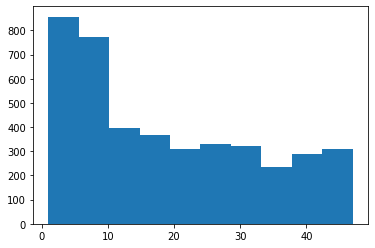

In [55]:
plt.hist(united7["duration_month"])

# ノック30(ここから自身の解答)

退会ユーザー・継続ユーザー毎の統計を確認

In [63]:
# 退会ユーザー

united7.loc[united7["is_deleted"] == 1, :].describe()

,is_deleted,price,mean,median,max,min,count,routine_flg,duration_month
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,3.215556,0.456296,8.026667
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,1.217087,0.498271,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,2.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,3.000000,0.000000,7.000000
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,4.000000,1.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,5.000000,1.000000,23.000000


In [64]:
# 継続ユーザー

united7.loc[united7["is_deleted"] == 0, :].describe()

,is_deleted,price,mean,median,max,min,count,routine_flg,duration_month
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,4.865588,0.984166,23.970443
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.406154,0.124855,13.746761
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,2.000000,0.000000,1.000000
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,5.000000,1.000000,12.000000
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,5.000000,1.000000,24.000000
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,5.000000,1.000000,35.000000
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,5.000000,1.000000,47.000000


最後にunited7をcsv出力する

In [68]:
united7.to_csv("united7.csv", encoding="utf_8_sig")